## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")    # Load the data
df.head()   # Display the first 5 rows of the data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()   # Display the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()   # Display the unique values in the flight_day column

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)    # Map the flight_day column to numerical values

In [6]:
df["flight_day"].unique()   # Display the unique values in the flight_day column

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()   # Display the summary statistics of the data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
for i in df.columns:    # Display the unique values in each column
    print(i, df[i].nunique())   # Display the number of unique values in each column

num_passengers 9
sales_channel 2
trip_type 3
purchase_lead 470
length_of_stay 335
flight_hour 24
flight_day 7
route 799
booking_origin 104
wants_extra_baggage 2
wants_preferred_seat 2
wants_in_flight_meals 2
flight_duration 21
booking_complete 2


In [9]:
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder class

In [10]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [11]:
df["sales_channel"] = LabelEncoder().fit_transform(df["sales_channel"])   # Encode the sales_channel column
df["trip_type"] = LabelEncoder().fit_transform(df["trip_type"])             # Encode the trip_type column
df["route"] = LabelEncoder().fit_transform(df["route"])             # Encode the route column
df["booking_origin"] = LabelEncoder().fit_transform(df["booking_origin"])          # Encode the booking_origin column

In [12]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,7,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,6,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


<Axes: >

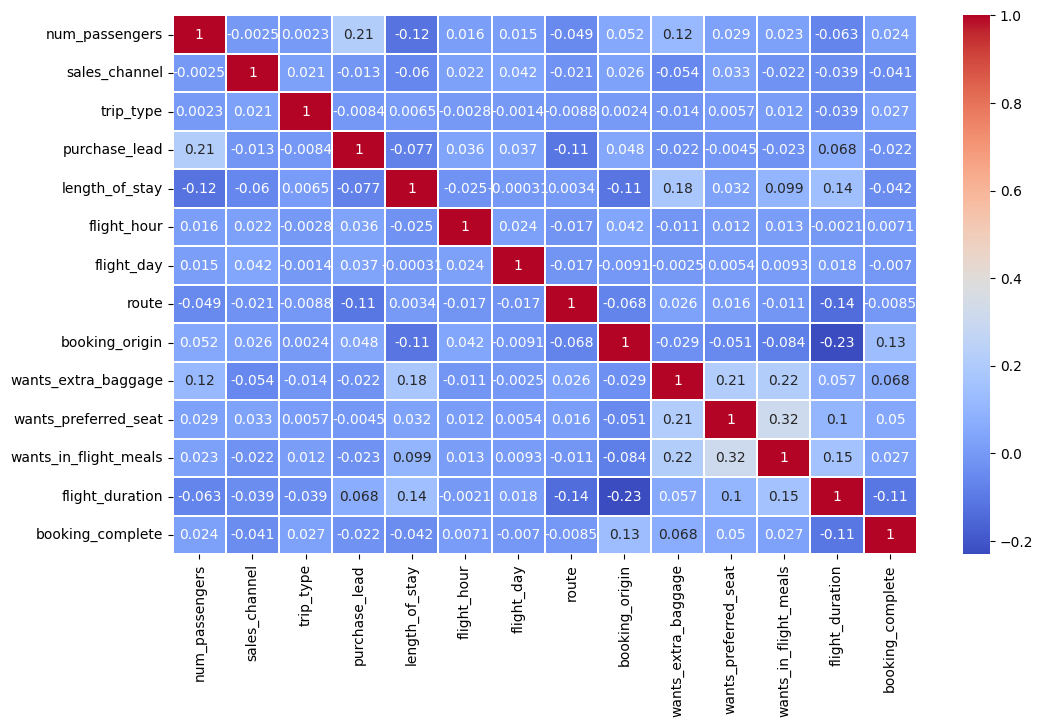

In [13]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)  # Display the correlation matrix

In [14]:
X = df.drop("booking_complete", axis=1)   # Define the features
y = df["booking_complete"]  # Define the target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  # Split the data into training and testing sets

In [21]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import accuracy_score #for accuracy
from sklearn.metrics import classification_report #for classification report

In [22]:
print("Number of class 0 are:", df[df["booking_complete"]==0]["booking_complete"].count())   # Display the number of class 0
print("Number of class 1 are:", df[df["booking_complete"]==1]["booking_complete"].count())   # Display the number of class 1

Number of class 0 are: 42522
Number of class 1 are: 7478


## Data is more biased towards "0" class

So to overcome this we use SMOTE which helps solve the issue of biasing

In [24]:
from imblearn.over_sampling import SMOTE    # Import the SMOTE class
from sklearn.model_selection import train_test_split    # Import the train_test_split function

# Assuming X and y are your feature matrix and target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
accuracy_scores = []    # Initialize an empty list to store the accuracy scores
models = []         # Initialize an empty list to store the models
cross_validations = []  # Initialize an empty list to store the cross-validation scores

In [26]:
from sklearn.linear_model import LogisticRegression    # Import the LogisticRegression class

c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6360162267035099
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      8444
           1       0.64      0.63      0.64      8565

    accuracy                           0.64     17009
   macro avg       0.64      0.64      0.64     17009
weighted avg       0.64      0.64      0.64     17009



c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

<Axes: >

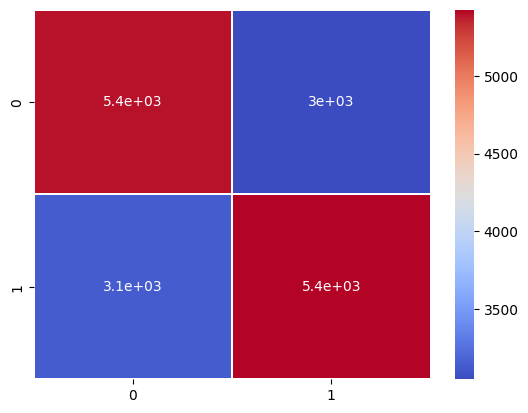

In [27]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
accuracy_scores.append(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
cross_validations.append(cross_val_score(model, X_resampled, y_resampled, cv=10).mean())
models.append("Logistic Regression")
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

0.8834734552295843
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      8444
           1       0.88      0.89      0.89      8565

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



<Axes: >

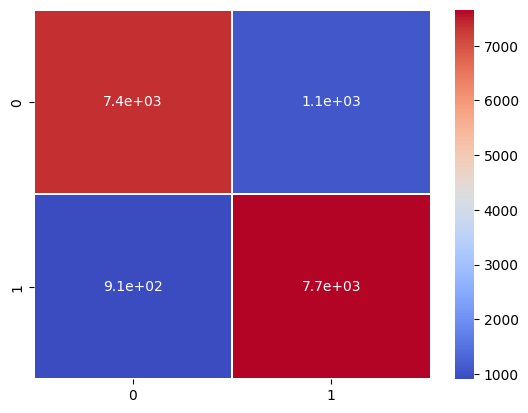

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
accuracy_scores.append(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())
models.append("RandomForest")
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)


0.7830560291610323
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      8444
           1       0.76      0.82      0.79      8565

    accuracy                           0.78     17009
   macro avg       0.78      0.78      0.78     17009
weighted avg       0.78      0.78      0.78     17009



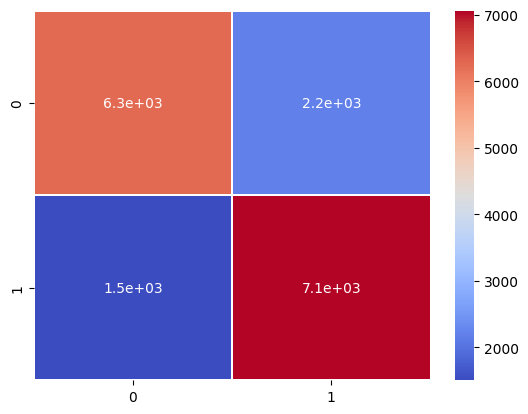

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
# Train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

models.append("GradientBoosting")
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())
accuracy_scores.append(accuracy_score(y_test, predictions))


0.8165089070492092
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      8444
           1       0.75      0.94      0.84      8565

    accuracy                           0.82     17009
   macro avg       0.84      0.82      0.81     17009
weighted avg       0.84      0.82      0.81     17009



<Axes: >

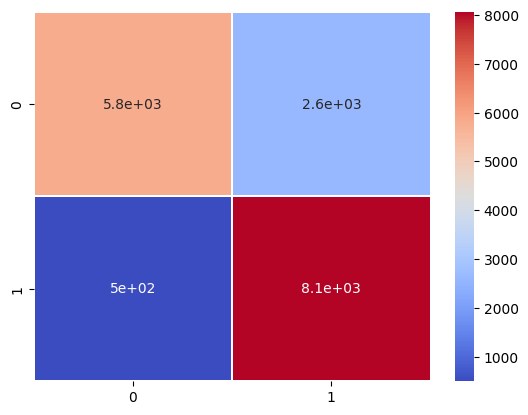

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Train the K-Nearest Neighbors model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
models.append("KNeighbors")
accuracy_scores.append(accuracy_score(y_test, predictions))
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

0.6240225762831442
              precision    recall  f1-score   support

           0       0.76      0.36      0.49      8444
           1       0.58      0.89      0.70      8565

    accuracy                           0.62     17009
   macro avg       0.67      0.62      0.59     17009
weighted avg       0.67      0.62      0.60     17009



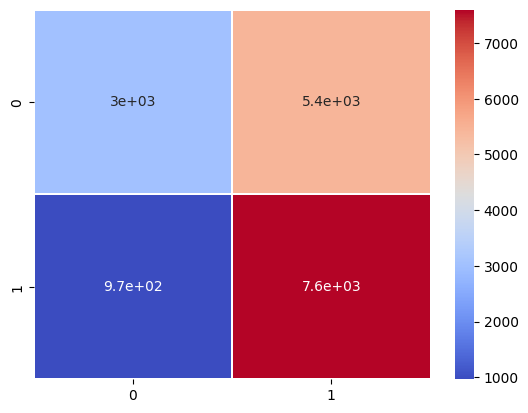

In [29]:
from sklearn.naive_bayes import GaussianNB
# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

models.append("GaussianNB")
accuracy_scores.append(accuracy_score(y_test, predictions))
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())

0.8273855017931683
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8444
           1       0.83      0.83      0.83      8565

    accuracy                           0.83     17009
   macro avg       0.83      0.83      0.83     17009
weighted avg       0.83      0.83      0.83     17009



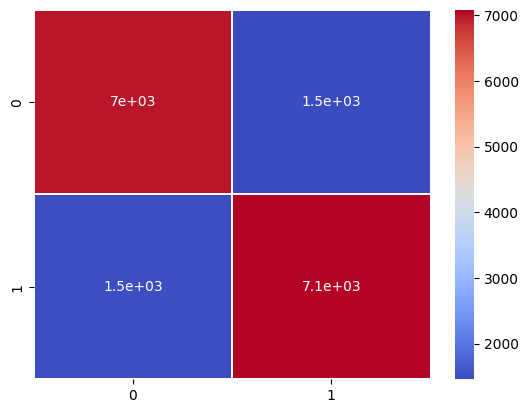

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree model
model = DecisionTreeClassifier(min_samples_split=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

models.append("DecisionTree")
accuracy_scores.append(accuracy_score(y_test, predictions))
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())

c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7149156329002293
              precision    recall  f1-score   support

           0       0.77      0.60      0.68      8444
           1       0.68      0.82      0.74      8565

    accuracy                           0.71     17009
   macro avg       0.73      0.71      0.71     17009
weighted avg       0.73      0.71      0.71     17009



c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Deep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

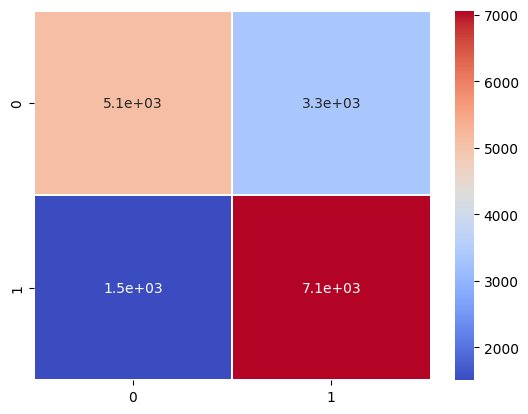

In [31]:
from sklearn.ensemble import AdaBoostClassifier
# Train the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, linewidths=0.2)

models.append("AdaBoost")
accuracy_scores.append(accuracy_score(y_test, predictions))
cross_validations.append(cross_val_score(model, X, y, cv=10).mean())

In [49]:
# Create a DataFrame to store the model accuracies
accuracies = pd.DataFrame({"Model": models, "Accuracy": accuracy_scores, "Cross Validation": cross_validations})

In [50]:
# Display the model accuracies
accuracies

,Model,Accuracy,Cross Validation
0,Logistic Regression,0.636193,0.606933
1,RandomForest,0.883473,0.491720
2,KNeighbors,0.883473,0.676600
3,GaussianNB,0.624023,0.815080
4,DecisionTree,0.827386,0.303140
5,AdaBoost,0.714916,0.838920
6,GradientBoosting,0.783056,0.487860


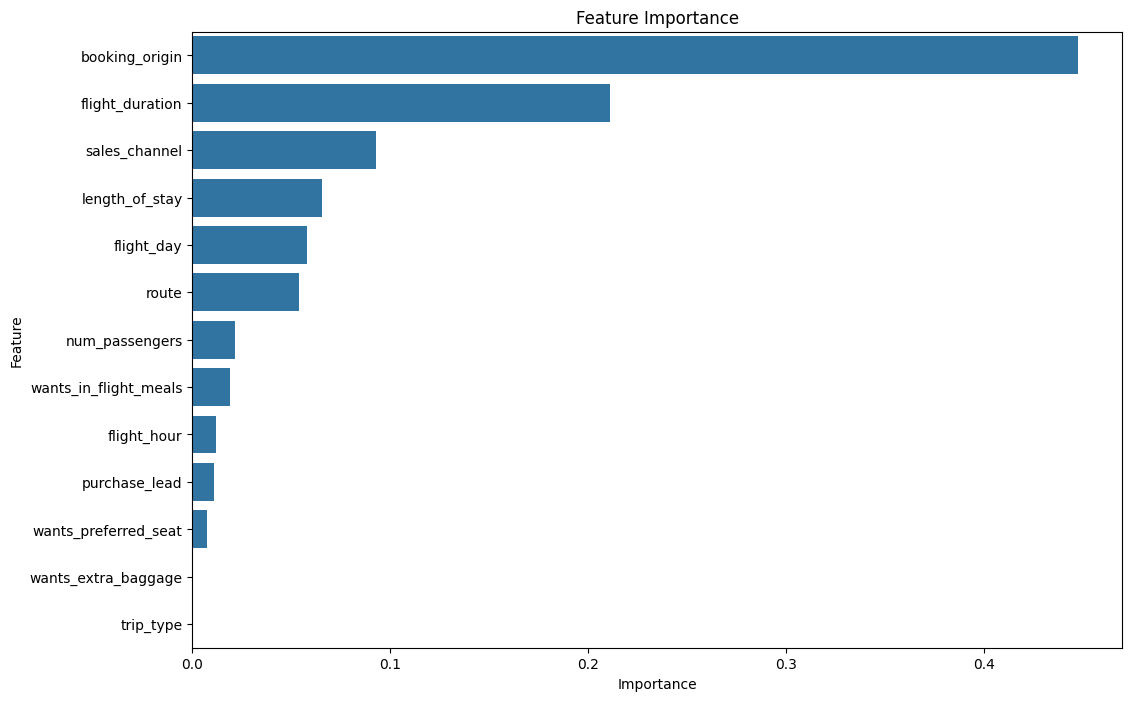

In [55]:
# The importance of each feature in the data

feature_importances = model.feature_importances_
features = X_resampled.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()